In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import gensim

In [176]:
df = pd.read_csv('browsing_data.csv',encoding='ISO-8859-1')
df = df.sample(frac = 1) 
df.shape

(509, 4)

In [181]:
df.columns

Index(['_unit_id', 'query', 'source', 'product_description'], dtype='object')

In [182]:
df.head()

,_unit_id,query,source,product_description
387,711165494,Rechargable batteries,google.com,Battery Pack for Wii Balance Board Compatible ...
277,711174815,adidas fragance,flipkart,"adidas Moves for Him Spray, 1.7 fl oz, is for ..."
167,711174274,tote bag,flipkart,This Women's Trellis Pattern 2-Pocket Tote Bag...
335,711175275,laptop lenovo,flipkart,The Lenovo Refurbished Laptop T410 has everyth...
146,711175828,pressure cooker,flipkart,The Presto 8-Quart Stainless Steel Pressure Co...


In [183]:
df = df.dropna()
x1 = df[['query','product_description']]
x1.head()

,query,product_description
387,Rechargable batteries,Battery Pack for Wii Balance Board Compatible ...
277,adidas fragance,"adidas Moves for Him Spray, 1.7 fl oz, is for ..."
167,tote bag,This Women's Trellis Pattern 2-Pocket Tote Bag...
335,laptop lenovo,The Lenovo Refurbished Laptop T410 has everyth...
146,pressure cooker,The Presto 8-Quart Stainless Steel Pressure Co...


In [184]:
vectorizer = TfidfVectorizer(stop_words = 'english')
x = vectorizer.fit_transform(x1['query'],x1['product_description'])
x

<509x142 sparse matrix of type '<class 'numpy.float64'>'
	with 1132 stored elements in Compressed Sparse Row format>

In [185]:
print(vectorizer.get_feature_names())

['15', '49ers', 'acoustic', 'adidas', 'aroma', 'bag', 'bags', 'batteries', 'bedspreads', 'bike', 'bird', 'black', 'blue', 'boot', 'boots', 'bras', 'brett', 'candle', 'chairs', 'clamp', 'clothes', 'coffee', 'conrad', 'cooker', 'cookware', 'corded', 'cowboy', 'cream', 'crocs', 'dc', 'diamond', 'diffuser', 'dinner', 'double', 'drawer', 'dress', 'dresses', 'drive', 'earbuds', 'ecco', 'eye', 'face', 'fair', 'favre', 'feeder', 'fifa', 'foam', 'fossil', 'fragance', 'francisco', 'gold', 'grinder', 'guitar', 'hard', 'headphones', 'headset', 'high', 'holders', 'ice', 'jeans', 'jersey', 'kitchen', 'kitchenaid', 'laptop', 'lauren', 'lc', 'led', 'lenovo', 'levis', 'lock', 'maker', 'mat', 'memory', 'mens', 'minecraft', 'mixer', 'monitor', 'mouse', 'mutant', 'necklace', 'nike', 'ninja', 'ny', 'organizer', 'oven', 'panasonic', 'pants', 'perfumes', 'pillow', 'pirates', 'pittsburgh', 'plain', 'plantronics', 'playstation', 'polarized', 'portable', 'pressure', 'rachel', 'rack', 'rain', 'ray', 'rechargable

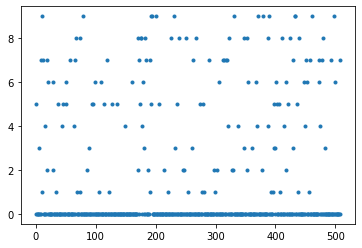

In [186]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x)
plt.plot(y_kmeans, ".")
plt.show()

In [187]:
# # Optimal clusters is 

true_k = 8

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(x)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print



Top terms per cluster:
Cluster 0:
 mixer
 kitchenaid
 yoga
 favre
 francisco
 fragance
 fossil
 foam
 fifa
 feeder
Cluster 1:
 coffee
 grinder
 gold
 pirates
 pittsburgh
 women
 high
 chairs
 dress
 wireless
Cluster 2:
 silver
 ring
 necklace
 jeans
 fragance
 fossil
 foam
 fifa
 feeder
 favre
Cluster 3:
 adidas
 fragance
 pants
 yoga
 feeder
 gold
 francisco
 fossil
 foam
 fifa
Cluster 4:
 playstation
 levis
 shoes
 crocs
 nike
 spiderman
 routers
 womens
 cream
 vanity
Cluster 5:
 drawer
 organizer
 guitar
 gold
 francisco
 fragance
 fossil
 foam
 fifa
 feeder
Cluster 6:
 boots
 cowboy
 snow
 feeder
 francisco
 fragance
 fossil
 foam
 fifa
 yoga
Cluster 7:
 dresses
 conrad
 lc
 lauren
 feeder
 francisco
 fragance
 fossil
 foam
 fifa


In [188]:
print("Cluster ID:")
Y = vectorizer.transform(["playstation"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[4]


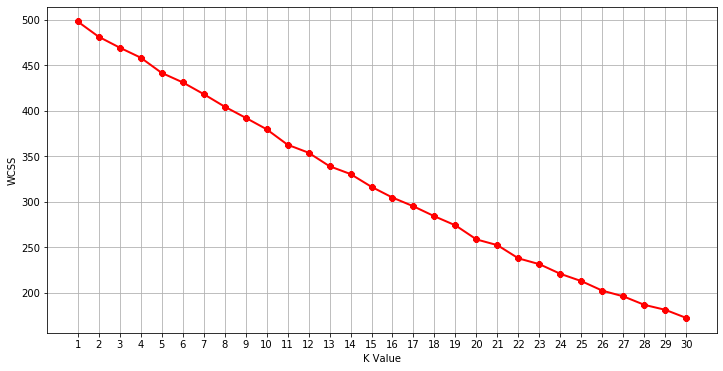

In [189]:
wcss = []
n=31
for k in range(1,n):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,n),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,n,1))
plt.ylabel("WCSS")
plt.show()

In [190]:
df['cluster'] = model.labels_

In [194]:
df['cluster'].value_counts()

1    226
4    175
6     22
2     21
3     20
7     17
5     15
0     13
Name: cluster, dtype: int64

In [192]:
df.sample(n=10)

,_unit_id,query,source,product_description,cluster
331,711175270,skechers womens shoes,flipkart,These Dr. Scholl's Aspire Wide-Width Women's W...,4
378,711165444,Levis,google.com,Your cute little cruiser and our comfy Trucker...,4
123,711171125,san francisco 49ers,google.com,San Francisco 49ers gift set. The watch featur...,4
138,711175743,wine rack,flipkart,This is handsome by itself or you can combine ...,1
6,711160467,plantronics corded headset,amazon,Optimized for PC music and calling - it s the ...,1
478,711166035,workout clothes for women,google.com,"Our fitness pants are so comfortable, you'll w...",1
174,711174303,routers,flipkart,The TP-LINK TL-WR720N is a simple and secure w...,4
221,711174497,silver ring,flipkart,This Blue Topaz and Smoky Quartz Ring shines o...,2
23,711161067,coffee grinder,amazon,This one-touch coffee grinder is all you will ...,1
183,711174343,yellow dress,flipkart,How cute is this floral dress from the designe...,4


In [197]:
user_query = 'wine rack'
y = vectorizer.transform([user_query])
cluster_id = model.predict(y)

In [198]:
print(cluster_id)

[1]
